### Checking the data structure and how data looks like

As I have been working in google Collab for fast computation power and easy data storage I am importing my datasets from Google drive for my analysis and smooth operations.

In [ ]:
import pandas as pd

In [ ]:
df0 = pd.read_csv("/content/drive/MyDrive/Tech Test/sales.txt", delimiter='\t')
df0.head()

,"trans_dt,apn,sales"
0,"2021-01-15 00:00:00,09556258004037,73.91"
1,"2021-02-27 00:00:00,09338475015566,6829.439999..."
2,"2021-01-07 00:00:00,09323610010759,415.1699999..."
3,"2021-01-22 00:00:00,09317376787611,10669.77000..."
4,"2021-02-14 00:00:00,000000x2201646,8.850000000..."


In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   trans_dt,apn,sales  1559 non-null   object
dtypes: object(1)
memory usage: 12.3+ KB


from the above txt file we can see that the data needs to be split into columns and rows according to the Transection date, APN, Sales using pandas function and datetime function to work with dates and different data types

### Cleaning of Sales data

In [ ]:
# Reading of Data set from google drive
with open('/content/drive/MyDrive/Tech Test/sales.txt', 'r') as file:
    lines = file.readlines()


# Initializing the empty lists for each column
trans_dt_list = []
apn_list = []
sales_list = []

# Changing into columns
for line in lines:
    parts = line.strip().split(',')

    # should be exactly 14 digits and should be only numeric as there was one value with a combination of number and a character X in it.
    apn = parts[1].strip()
    if len(apn) == 14 and apn.isdigit():
        trans_dt = parts[0].strip()
        sales = float(parts[2].strip())

        # Appending the values to respective lists
        trans_dt_list.append(trans_dt)
        apn_list.append(int(apn))
        sales_list.append(sales)

# creation of new dataframe called df
df = pd.DataFrame({
    'trans_dt': trans_dt_list,
    'APN': apn_list,
    'sales': sales_list
})

# Printing the cleaned DataFrame
print(df)


                 trans_dt            APN     sales
0     2021-01-15 00:00:00  9556258004037     73.91
1     2021-02-27 00:00:00  9338475015566   6829.44
2     2021-01-07 00:00:00  9323610010759    415.17
3     2021-01-22 00:00:00  9317376787611  10669.77
4     2021-01-24 00:00:00  9322838006797    134.10
...                   ...            ...       ...
1553  2021-03-24 00:00:00  9322838006797    268.20
1554  2021-02-21 00:00:00  3145891124309    143.10
1555  2021-02-10 00:00:00  8901296027783    524.86
1556  2021-02-05 00:00:00  9338475011872   1408.97
1557  2021-02-14 00:00:00  9317935013076    264.94

[1558 rows x 3 columns]


In [ ]:
df.head()

,trans_dt,APN,sales
0,2021-01-15 00:00:00,9556258004037,73.91
1,2021-02-27 00:00:00,9338475015566,6829.44
2,2021-01-07 00:00:00,9323610010759,415.17
3,2021-01-22 00:00:00,9317376787611,10669.77
4,2021-01-24 00:00:00,9322838006797,134.10


After cleaning data the table is ready for further analysis on the colunms asked for

### Working with Product txt file to see any error or structure for data combining

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Tech Test/product.txt", delimiter='\t')
df1.head()

,Product_Description,APN,Brand
0,NATIO SENSITIVE SK DELIC EYE CR 25 G,9316542115012,NATIO
1,N/W WH COCONUT+PEA PROTEIN PWDR 300 G,9314807050061,NATURES WAY
2,DARIO GLUCOSE STRP 100,7290107610315,DARIO
3,CENTRUM SPECIALIST VISION TABLETS 60,9310488002115,CENTRUM
4,OTIFLEKS PROTECTOR TYPE R SMALL,8699245891157,OTIFLEKS


### Merging product and sales data together based on common APN  column and using inner join function on pandas to match the common values.

In [ ]:
combined_df = pd.merge(df, df1, on='APN', how='inner') # the common column here is APN so we use inner join
combined_df.head()


,trans_dt,APN,sales,Product_Description,Brand
0,2021-01-15 00:00:00,9556258004037,73.91,DECOZOL ORAL GEL 2 % 40 G,DECOZOL
1,2021-03-27 00:00:00,9556258004037,18.99,DECOZOL ORAL GEL 2 % 40 G,DECOZOL
2,2021-02-15 00:00:00,9556258004037,60.78,DECOZOL ORAL GEL 2 % 40 G,DECOZOL
3,2021-02-05 00:00:00,9556258004037,33.24,DECOZOL ORAL GEL 2 % 40 G,DECOZOL
4,2021-03-03 00:00:00,9556258004037,85.87,DECOZOL ORAL GEL 2 % 40 G,DECOZOL


In [ ]:
output_file_path = f"/content/drive/MyDrive/Tech Test/MyWorking/firstoutput.txt"
combined_df.to_csv(output_file_path, index=False, sep="\t")

First file has been created using the common column and link between the two dataframes provided.

### Now that we have created the merged file and saved it on the local file we will be working on combined data

In [ ]:
# Convert 'trans_dt' column to datetime if it's not already
combined_df['trans_dt'] = pd.to_datetime(df['trans_dt'])

In [ ]:
combined_df['trans_dt'] = pd.to_datetime(combined_df['trans_dt'])

# Extracting year, month, and full month name from 'trans_dt'
combined_df['Year'] = combined_df['trans_dt'].dt.year
combined_df['Month'] = combined_df['trans_dt'].dt.month
combined_df['Month_Name'] = combined_df['trans_dt'].dt.strftime('%B')

# Creating a new column 'Month_Year' by combining 'Month_Name' and 'Year'
combined_df['Month_Year'] = combined_df['Month_Name'] + ' ' + combined_df['Year'].astype(str)

# Pivot the 'sales' column into a monthly breakdown
pivot_df = combined_df.pivot_table(index=['APN', 'Product_Description', 'Brand', 'Month_Year'], values='sales', aggfunc='sum').reset_index()

# Rename columns
pivot_df.rename(columns={'sales': 'Monthly_Sales'}, inplace=True)

# Printing the pivoted DataFrame
print(pivot_df.head())


            APN                       Product_Description  \
0      22016461        ULTA3 NAIL POLISH OVER THE RAINBOW   
1      22016461        ULTA3 NAIL POLISH OVER THE RAINBOW   
2      22016461        ULTA3 NAIL POLISH OVER THE RAINBOW   
3  680248540003  ORIENTAL BOTANICALS WOMENS QI TABLETS 60   
4  680248540003  ORIENTAL BOTANICALS WOMENS QI TABLETS 60   

                 Brand     Month_Year  Monthly_Sales  
0                ULTA3  February 2021        687.347  
1                ULTA3   January 2021        791.708  
2                ULTA3     March 2021        536.365  
3  ORIENTAL BOTANICALS  February 2021        959.210  
4  ORIENTAL BOTANICALS   January 2021       1036.750  


In [ ]:
output_file_path = f"/content/drive/MyDrive/Tech Test/MyWorking/secondoutput.xlsx"
pivot_df.to_csv(output_file_path, index=False, sep="\t")

Second file has been created for pivioting two data together based on the first 3 months sales and for different product keeping sales as common value and saving the excel file in the local folder.

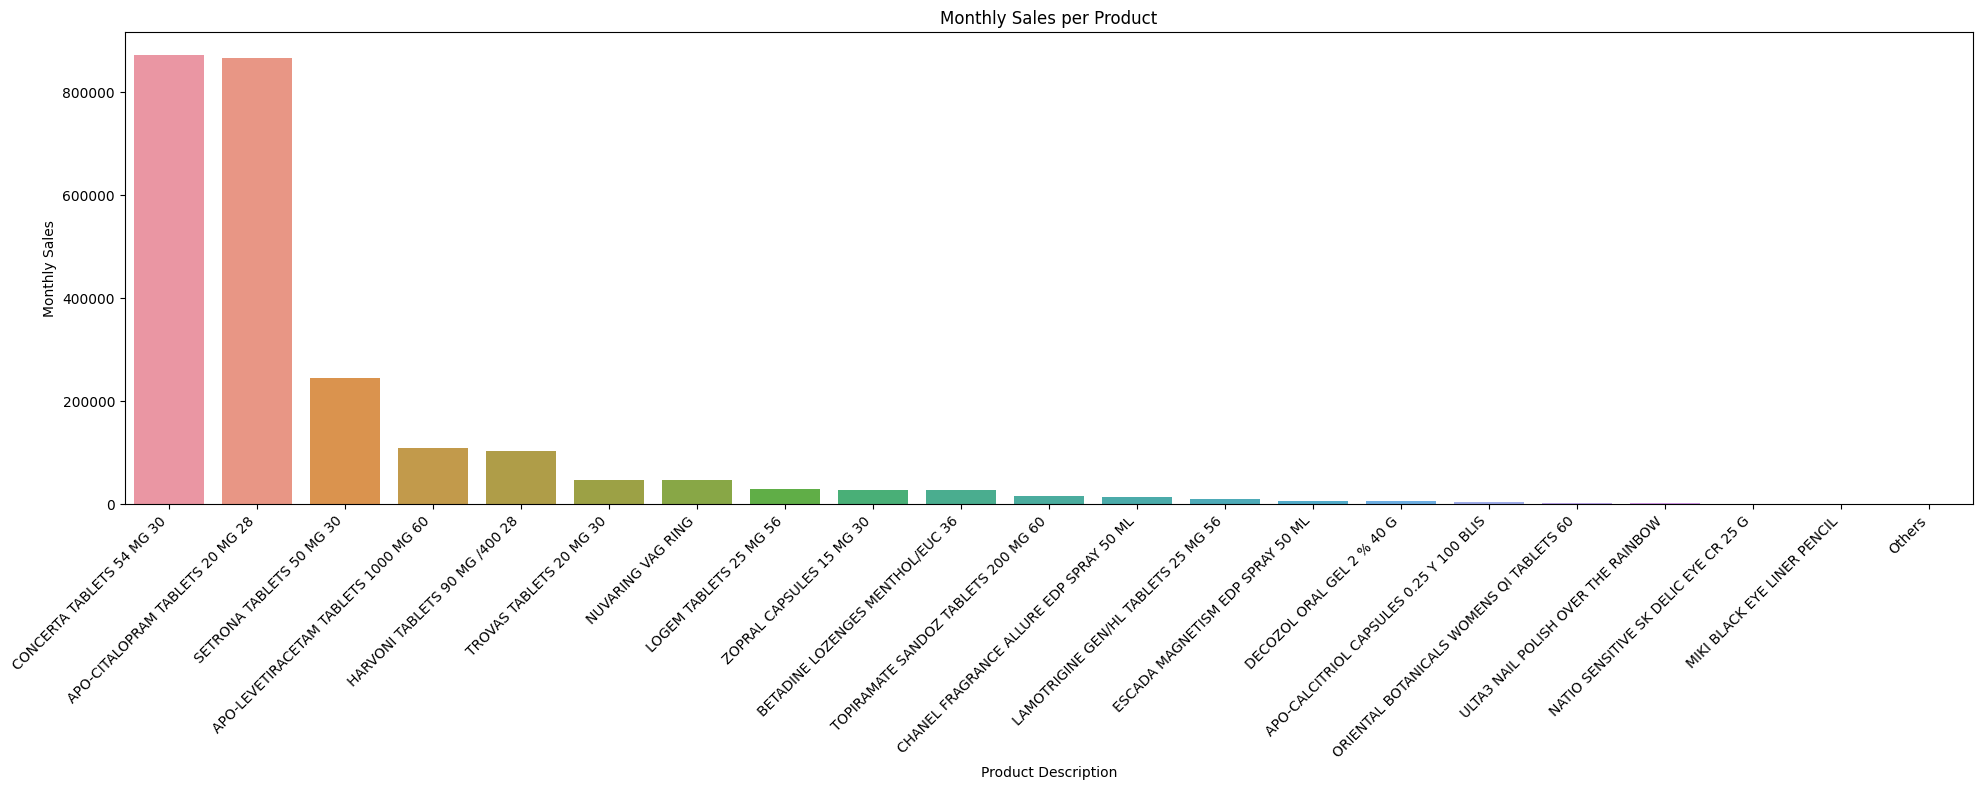

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # libraries for visualization

grouped_df = pivot_df.groupby('Product_Description')['Monthly_Sales'].sum().reset_index()

grouped_df = grouped_df.sort_values(by='Monthly_Sales', ascending=False) # We will get the most selling product by decending order


top_n = 20  # selecting 20 products in the line
top_products = grouped_df.head(top_n)
other_products = grouped_df.iloc[top_n:]

# Create a new DataFrame with top products and 'Others'
final_df = pd.concat([top_products, pd.DataFrame({
    'Product_Description': ['Others'],
    'Monthly_Sales': [other_products['Monthly_Sales'].sum()]
})])

# Create a bar plot of monthly sales per product
plt.figure(figsize=(20, 8))  # Adjust the figure size as needed

sns.barplot(x='Product_Description', y='Monthly_Sales', data=final_df)

plt.title('Monthly Sales per Product')
plt.xlabel('Product Description')
plt.ylabel('Monthly Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()



##Plot Summary
As we can see the products for monthly sales with most selling to least selling products throught the timeframe and is depicted in different colors.
Concertra is the higgest selling which can be double checked with the excel workings as well followed by other tablets for clinical diseases.

In [ ]:
bridge = pd.read_csv('/content/drive/MyDrive/Tech Test/Bridge.csv')

bridge.head(10)


,APN,name
0,1000000000000000,BUPRENORPHINE-SANDOZ PATCH 15MCG 2
1,100000000000000,NORGESIC TAB-BLIS 35MG-450MG 24
2,10000000000000,B- FOUNTIAN OF YOUTH
3,10000000000000,CIRCADIN TAB-PR 2MG 21
4,10000000000000,BOTTLES AMBER 100ML WITH DROPPER
5,1000000000000,TW-MOMETASONE NASAL SPRAY
6,1000000000000,LOREAL DELETED LINES
7,99999999999,GARNIER OLIA 7.13 DRK BGE BLND
8,99999999999,SPIRACTIN TAB 25MG 100
9,1000000000000,WINDSOR TORTOISE SHELL POCKET COMB


In [ ]:
product_counts = {}
def generate_uid(APN, product_counts):       # Function to generate the unique identifier
    if APN not in product_counts:
        product_counts[APN] = 1
    else:
        product_counts[APN] += 1
    return f'UID{APN.zfill(7)}{product_counts[APN]:02d}'

bridge['UID'] = bridge.apply(lambda row: generate_uid(row['APN'], product_counts), axis=1)

bridge.to_csv('output_file.csv', index=False)

In [ ]:
def append_unique_ids(input_file, output_file):
    # Read the input CSV file into a DataFrame
    df = pd.read_csv(input_file)

    # Create a dictionary to store the mapping of APN to UID
    apn_to_uid = {}
    next_uid_number = 1

    # Function to generate the UID
    def generate_uid():
        nonlocal next_uid_number
        uid = f'UID{str(next_uid_number).zfill(7)}'
        next_uid_number += 1
        return uid

    # Iterate through the DataFrame and assign UIDs
    for index, row in df.iterrows():
        apn = row['APN']
        if apn not in apn_to_uid:
            apn_to_uid[apn] = generate_uid()

    # Add the UIDs as a new column to the DataFrame
    df['UID'] = df['APN'].map(apn_to_uid)

    # Save the updated DataFrame as a new CSV file
    df.to_csv(output_file, index=False)

    print(f"Unique identifiers appended and saved to {output_file}")

# Specify the input and output file names
input_file = '/content/drive/MyDrive/Tech Test/Bridge.csv'
output_file = '/content/drive/MyDrive/Tech Test/MyWorking/Bridge_UID.csv'

# Call the function to append unique identifiers
append_unique_ids(input_file, output_file)


Unique identifiers appended and saved to /content/drive/MyDrive/Tech Test/MyWorking/Bridge_UID.csv
